In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import re

In [2]:
from fastai.tabular import add_datepart

In [3]:
df = pd.read_csv('../HackerEarthPredictGiftPrices/dataset/train.csv')

In [4]:
df.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [5]:
df.describe()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
count,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,7323.000000,20279.000000
mean,739.554662,394.171557,3303.358548,5314.595345,4187.653928,4866.945510,1679.152226,8.652695,1265.898171,0.229646,15.515363,143.404411
std,389.216989,235.077769,2541.082549,2703.317282,2274.875522,2713.856392,485.699119,2.349388,697.838495,0.420616,7.579669,267.281159
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.010000
25%,403.000000,188.000000,587.000000,3311.000000,2251.000000,2548.000000,1801.000000,9.000000,577.500000,0.000000,9.000000,45.645000
50%,825.000000,433.000000,3231.000000,5520.000000,4246.000000,4839.000000,1912.000000,9.000000,1616.000000,0.000000,13.000000,75.600000
75%,1032.000000,534.000000,5787.000000,7535.000000,6504.500000,7387.000000,1912.000000,10.000000,1899.000000,0.000000,24.000000,126.845000
max,1360.000000,893.000000,7567.000000,9979.000000,7604.000000,9493.000000,2056.000000,10.000000,2065.000000,1.000000,29.000000,7010.270000


In [6]:
def missingcheck(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
    return missing_data


In [7]:
missingcheck(df)

,Total,%
volumes,12956,63.9
price,0,0.0
lsg_2,0,0.0
gift_type,0,0.0
gift_category,0,0.0
gift_cluster,0,0.0
instock_date,0,0.0
stock_update_date,0,0.0
lsg_1,0,0.0
lsg_3,0,0.0


In [8]:
#dff = df.drop( ['volumes'],axis =1)
dff = df.fillna(0)

In [9]:
dff['instock_date'] = pd.to_datetime(dff['instock_date'] ,errors='coerce')
dff['justinstock_date'] = dff['instock_date'].dt.date

In [10]:
dff['stock_update_date'] = pd.to_datetime(dff['stock_update_date'] ,errors='coerce')
dff['juststock_update_date'] = dff['stock_update_date'].dt.date

In [11]:
dff['uk_date1'] = pd.to_datetime(dff['uk_date1'] ,errors='coerce')
dff['justuk_date1'] = dff['uk_date1'].dt.date

In [12]:
dff['uk_date2'] = pd.to_datetime(dff['uk_date2'] ,errors='coerce')
dff['justuk_date2'] = dff['uk_date2'].dt.date

In [13]:
# no of days gift was in stock

In [14]:
dff['DaysStockUpdate'] = (dff['stock_update_date']- dff['instock_date']).dt.days

In [15]:
#no of days between order1 and order2

In [16]:
dff['buyer12diff'] = (dff['uk_date1']-dff['uk_date2']).dt.days
dff['buyer12diff'] = np.absolute(dff['buyer12diff'])

In [17]:
# at order1 time was gift in stock

In [18]:
dff['buy1buytime'] = (dff['uk_date1'] -dff['instock_date']).dt.days

In [19]:
dff['buy1buytime'].sort_values()

12967     -5
11146     -5
18180     -5
6231      -5
10812     -5
        ... 
47       881
12       897
8        986
3        989
4        989
Name: buy1buytime, Length: 20279, dtype: int64

In [20]:
# order 2 in stock

In [21]:
dff['buy2buytime'] = (dff['uk_date2'] -dff['instock_date']).dt.days

In [22]:
dff['buy2buytime'].sort_values()

16939   -585
17729   -583
18807   -582
18470   -579
19393   -579
        ... 
61       871
47       877
12       892
4        987
3        987
Name: buy2buytime, Length: 20279, dtype: int64

In [23]:
# stockupdate date differece 

In [24]:
dff['stockupdatediff1'] = (dff['stock_update_date'] - dff['uk_date1']).dt.days

In [25]:
dff['stockupdatediff2'] = (dff['stock_update_date'] - dff['uk_date2']).dt.days

In [26]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
#     for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
    
    for n in ('Year', 'Month', 'Week', 'Day','Hour', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [27]:
add_datepart(dff, 'instock_date',drop = False)

In [28]:
add_datepart(dff, 'stock_update_date',drop =False)

In [29]:
add_datepart(dff, 'uk_date1', drop=False)

In [30]:
add_datepart(dff, 'uk_date2', drop= False)

In [31]:
dff['instock_date'].max()

Timestamp('2016-11-12 13:48:30')

In [32]:
dff['stock_update_date'].max()

Timestamp('2017-04-21 01:49:50')

In [33]:
dff['uk_date2'].max()

Timestamp('2017-04-17 16:14:57.904000')

In [34]:
import holidays

In [35]:
### was it a holiday or not instockdate, stockupdateday,ukdate1,ukdate2
time = pd.DataFrame()

In [36]:
# start = dff['instock_date'].min()

# end = dff['stock_update_date'].max()

# time['date'] = pd.date_range(start,end)

In [37]:
# uk_holidays=[]
# for holiday in holidays.UK(years=[2014,2015,2016]).items():
#     uk_holidays.append(str(holiday[0]))

In [38]:
#uk_holidays

In [39]:
# dff['Isholidayinstock']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['instock_date']]
# dff['Isholidaystockupdate']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['stock_update_date']]
# dff['IsholidayUkdate1']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['uk_date1']]
# dff['IsholidayUkdate2']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['uk_date2']]

In [40]:
####### grace period dates ######

In [41]:
from datetime import datetime, timedelta

In [42]:
uk_graceholiday=[]
for holiday in holidays.UK(years=[2014,2015,2016]).items():
    uk_graceholiday.append(holiday[0])

In [43]:
graceondate=[]
for i in uk_graceholiday:
    twodayago = i - timedelta(days = 3)
    twodayafter = i + timedelta(days = 3)
    for date in pd.date_range(twodayago,twodayafter):
        graceondate.append((str(date).split()[0]))
    

In [44]:
uk_graceperiod = list(set(graceondate))

In [45]:
dff['Isholidayinstockgrceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['instock_date']]
dff['Isholidaystock_update_dategrceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['stock_update_date']]
dff['IsholidayUk_date1grceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['uk_date1']]
dff['IsholidayUk_date2grceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['uk_date2']]


In [46]:
# interaction variables 

In [47]:
def createIntercations(data,cat_features):
    import itertools
    print(f"Creating features on {cat_features}, with combination 2 for training data /n")
    interactionstrain = pd.DataFrame(index=data.index)
    
    for col1 ,col2 in  itertools.combinations(cat_features,2):   
        newcolname = col1 + "_" + col2 #+"_" + col3
        new_values = data[col1].map(str) + "_" + data[col2].map(str) # + "_" + data[col3].map(str)
        interactionstrain[newcolname] = new_values

    print(interactionstrain)
    data_df = data.join(interactionstrain)
    
    
    print(data_df.shape)
    
    
    return data_df


In [48]:
def createIntercations2(data,cat_features):
    import itertools
    print(f"Creating features on {cat_features}, with combination 3 for training data /n")
    interactionstrain = pd.DataFrame(index=data.index)
    
    for col1 ,col2,col3 in  itertools.combinations(cat_features,3):   
        newcolname = col1 + "_" + col2 +"_" + col3
        new_values = data[col1].map(str) + "_" + data[col2].map(str)  + "_" + data[col3].map(str)
        interactionstrain[newcolname] = new_values

    print(interactionstrain)
    data_df = data.join(interactionstrain)
    
    
    print(data_df.shape)
    
    
    return data_df


In [49]:
# def createlogfestures(data,features):
  
#      cols = features
#      interactionstrain = pd.DataFrame(index=data.index)
        
#      for col  in cols:   
#             newcolname = col + "_log"   
#             new_values = np.log1p(data[col])
#             interactionstrain[newcolname] = new_values

  

#      data_df = data.join(interactionstrain)
  
#      print(data_df.shape)


#      return data_df 


In [50]:
# def createsqrtfeatures(train,test,features):
    

#   cols = features
#   interactionstrain = pd.DataFrame(index=train.index)
#   interactionstest = pd.DataFrame(index=test.index)
  
#   for col  in cols:   
#         newcolname = col + "_sqrt"   
#         new_values = np.sqrt(train[col])
#         interactionstrain[newcolname] = new_values

#   for col  in cols:   
#         newcolname = col + "_sqrt"   
#         new_values = np.sqrt(test[col])
#         interactionstest[newcolname] = new_values


#   train_df = train.join(interactionstrain)
#   test_df = test.join(interactionstest)

#   print(train_df.shape,test_df.shape)


#   return train_df ,test_df


In [51]:
interactiondff1 = createIntercations(dff,['gift_type','gift_category','gift_cluster'])

Creating features on ['gift_type', 'gift_category', 'gift_cluster'], with combination 2 for training data /n
      gift_type_gift_category gift_type_gift_cluster  \
0                      61_534                61_3942   
1                      61_534                61_3942   
2                     584_262                  584_0   
3                      61_534                61_3942   
4                      61_534                61_3942   
...                       ...                    ...   
20274                 105_704               105_6448   
20275                1220_526               1220_817   
20276                 509_705                509_821   
20277                 682_213               682_5620   
20278                1061_212              1061_4987   

      gift_category_gift_cluster  
0                       534_3942  
1                       534_3942  
2                          262_0  
3                       534_3942  
4                       534_3942  
...     

In [52]:
interactiondff2 = createIntercations2(interactiondff1,['gift_type','gift_category','gift_cluster'])

Creating features on ['gift_type', 'gift_category', 'gift_cluster'], with combination 3 for training data /n
      gift_type_gift_category_gift_cluster
0                              61_534_3942
1                              61_534_3942
2                                584_262_0
3                              61_534_3942
4                              61_534_3942
...                                    ...
20274                         105_704_6448
20275                         1220_526_817
20276                          509_705_821
20277                         682_213_5620
20278                        1061_212_4987

[20279 rows x 1 columns]
(20279, 91)


In [53]:
interactiondff2.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,...,uk_date2Is_year_start,uk_date2Elapsed,Isholidayinstockgrceperiod,Isholidaystock_update_dategrceperiod,IsholidayUk_date1grceperiod,IsholidayUk_date2grceperiod,gift_type_gift_category,gift_type_gift_cluster,gift_category_gift_cluster,gift_type_gift_category_gift_cluster
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,...,False,1393225626,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,...,False,1393222026,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
2,GF_15689,584,262,0,2014-02-21 09:30:21,2016-03-24 14:46:18,5290,1579,3203,1912,...,False,1458266400,0,1,0,1,584_262,584_0,262_0,584_262_0
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,...,False,1478404800,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,...,False,1478394000,0,0,0,0,61_534,61_3942,534_3942,61_534_3942


In [54]:
# import matplotlib.pyplot as plt
# interactiondff2.boxplot()

In [55]:
interactiondff3 = createIntercations(interactiondff2,['lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6'])

Creating features on ['lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6'], with combination 2 for training data /n
      lsg_1_lsg_2 lsg_1_lsg_3 lsg_1_lsg_4 lsg_1_lsg_5 lsg_1_lsg_6 lsg_2_lsg_3  \
0       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
1       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
2       5290_1579   5290_3203   5290_1912      5290_9   5290_1578   1579_3203   
3       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
4       3377_5221    3377_504   3377_1912      3377_9    3377_554    5221_504   
...           ...         ...         ...         ...         ...         ...   
20274   2055_6883    2055_995   2055_1912     2055_10   2055_1899    6883_995   
20275   8323_6753   8323_6706   8323_1912     8323_10   8323_1899   6753_6706   
20276   2826_4009   2826_2912   2826_1912     2826_10   2826_1451   4009_2912   
20277   2089_6883   2089_3607   2089_1912     2089_10    2089_822   6883_

In [56]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        from sklearn.preprocessing import LabelEncoder

        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


In [57]:
def catVar2(data):
    categorical_colsT2 = [cname for cname in data.columns if data[cname].dtype == "object"]
    return categorical_colsT2


In [58]:
def robustlabelencoder(train,test):
    from sklearn.preprocessing import LabelEncoder

    label_enc = LabelEncoderExt()
    cols = catVar2(train)
    print(cols)
    for col in cols:
        label_enc.fit(train[col])
        train[col] = label_enc.transform(train[col])
        test[col] = label_enc.transform(test[col])
        
    print(train.shape,test.shape)
    
    return train,test


In [59]:
## delete dates

In [60]:
interactiondff3['justuk_date1'].dtypes

dtype('O')

In [61]:
date_cols = [cname for cname in interactiondff3.columns if interactiondff3[cname].dtype == "datetime64[ns]"]

In [62]:
date_cols

['instock_date', 'stock_update_date', 'uk_date1', 'uk_date2']

In [63]:
interactiondff3.shape

(20279, 106)

In [64]:
final_df = interactiondff3.drop(['instock_date', 'stock_update_date', 'uk_date1', 'uk_date2','justinstock_date','juststock_update_date','justuk_date1','justuk_date2','gift_id'],axis =1)*1

In [65]:
final_df.columns

Index(['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3',
       'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted', 'volumes', 'price',
       'DaysStockUpdate', 'buyer12diff', 'buy1buytime', 'buy2buytime',
       'stockupdatediff1', 'stockupdatediff2', 'instock_Year', 'instock_Month',
       'instock_Week', 'instock_Day', 'instock_Hour', 'instock_Dayofweek',
       'instock_Dayofyear', 'instock_Is_month_end', 'instock_Is_month_start',
       'instock_Is_quarter_end', 'instock_Is_quarter_start',
       'instock_Is_year_end', 'instock_Is_year_start', 'instock_Elapsed',
       'stock_update_Year', 'stock_update_Month', 'stock_update_Week',
       'stock_update_Day', 'stock_update_Hour', 'stock_update_Dayofweek',
       'stock_update_Dayofyear', 'stock_update_Is_month_end',
       'stock_update_Is_month_start', 'stock_update_Is_quarter_end',
       'stock_update_Is_quarter_start', 'stock_update_Is_year_end',
       'stock_update_Is_year_start', 'stock_update_Elapsed', 'uk_d

In [66]:
########## Target variable#######
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



 mu = 143.40 and sigma = 267.27



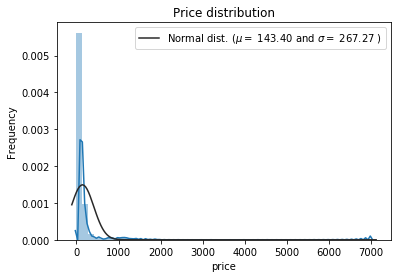

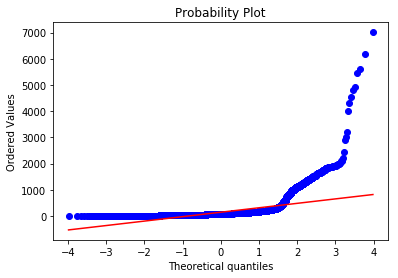

In [67]:
sns.distplot(interactiondff3['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(final_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(final_df['price'], plot=plt)
plt.show()

In [68]:
interactiondff4 = final_df.copy()


 mu = 4.38 and sigma = 0.97



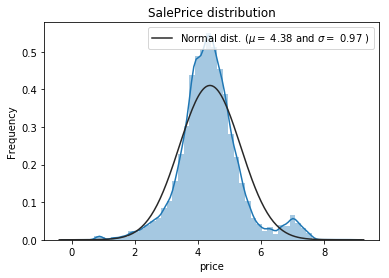

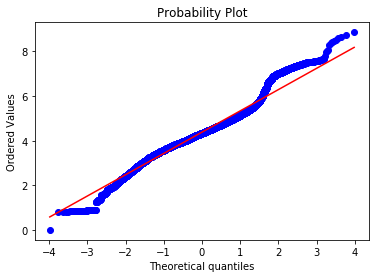

In [69]:
interactiondff4["price"] = np.log1p(final_df["price"])

#Check the new distribution 
sns.distplot(interactiondff4['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(interactiondff4['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(interactiondff4['price'], plot=plt)
plt.show()


 mu = 3.94 and sigma = 0.82



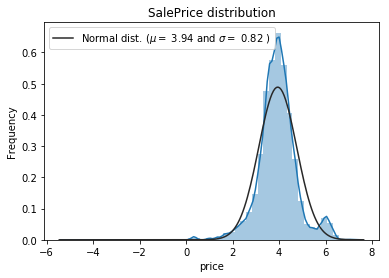

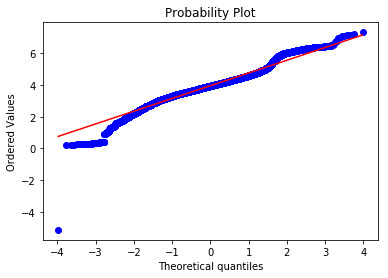

In [70]:
interactiondff4['price'],fitted_lambda = stats.boxcox(final_df['price'])
# use lambda value to transform test data
#test_data = stats.boxcox(test, fitted_lambda)
#Check the new distribution 
sns.distplot(interactiondff4['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(interactiondff4['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(interactiondff4['price'], plot=plt)
plt.show()

In [71]:
#from scipy.special import boxcox, inv_boxcox
interactiondff4

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,...,lsg_2_lsg_3,lsg_2_lsg_4,lsg_2_lsg_5,lsg_2_lsg_6,lsg_3_lsg_4,lsg_3_lsg_5,lsg_3_lsg_6,lsg_4_lsg_5,lsg_4_lsg_6,lsg_5_lsg_6
0,61,534,3942,3377,5221,504,1912,10,554,0,...,5221_504,5221_1912,5221_10,5221_554,504_1912,504_10,504_554,1912_10,1912_554,10_554
1,61,534,3942,3377,5221,504,1912,10,554,1,...,5221_504,5221_1912,5221_10,5221_554,504_1912,504_10,504_554,1912_10,1912_554,10_554
2,584,262,0,5290,1579,3203,1912,9,1578,1,...,1579_3203,1579_1912,1579_9,1579_1578,3203_1912,3203_9,3203_1578,1912_9,1912_1578,9_1578
3,61,534,3942,3377,5221,504,1912,10,554,0,...,5221_504,5221_1912,5221_10,5221_554,504_1912,504_10,504_554,1912_10,1912_554,10_554
4,61,534,3942,3377,5221,504,1912,9,554,1,...,5221_504,5221_1912,5221_9,5221_554,504_1912,504_9,504_554,1912_9,1912_554,9_554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,105,704,6448,2055,6883,995,1912,10,1899,0,...,6883_995,6883_1912,6883_10,6883_1899,995_1912,995_10,995_1899,1912_10,1912_1899,10_1899
20275,1220,526,817,8323,6753,6706,1912,10,1899,0,...,6753_6706,6753_1912,6753_10,6753_1899,6706_1912,6706_10,6706_1899,1912_10,1912_1899,10_1899
20276,509,705,821,2826,4009,2912,1912,10,1451,0,...,4009_2912,4009_1912,4009_10,4009_1451,2912_1912,2912_10,2912_1451,1912_10,1912_1451,10_1451
20277,682,213,5620,2089,6883,3607,1912,10,822,0,...,6883_3607,6883_1912,6883_10,6883_822,3607_1912,3607_10,3607_822,1912_10,1912_822,10_822


In [72]:
numeric_feats = interactiondff4.dtypes[interactiondff4.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = interactiondff4[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
uk_date2Is_year_end,142.393820
instock_Is_year_end,100.680187
uk_date2Is_year_start,82.198947
uk_date1Is_year_end,82.198947
stock_update_Is_quarter_end,19.123593
stock_update_Is_quarter_start,16.463420
uk_date2Is_quarter_start,14.664869
stock_update_Is_month_end,11.910372
uk_date2Is_quarter_end,11.232694
instock_Is_quarter_start,6.808915


In [73]:
from sklearn.model_selection import train_test_split


In [74]:
y = final_df.price
X = final_df.drop(['price'], axis=1)


In [75]:
#feature selected finally 

d = ['uk_date2Dayofyear',
 'uk_date2Day',
 'uk_date1Hour',
 'uk_date1Dayofyear',
 'stockupdatediff2',
 'stockupdatediff1',
 'stock_update_Hour',
 'stock_update_Dayofyear',
 'stock_update_Day',
 'lsg_2_lsg_6',
 'lsg_2_lsg_5',
 'lsg_2_lsg_4',
 'lsg_1_lsg_3',
 'lsg_1_lsg_2',
 'instock_Dayofyear',
 'gift_type_gift_cluster',
 'gift_type_gift_category_gift_cluster',
 'buy2buytime',
 'DaysStockUpdate',
 'uk_date2Week',
 'uk_date2Elapsed',
 'uk_date1Week',
 'uk_date1Elapsed',
 'stock_update_Elapsed',
 'lsg_6',
 'lsg_5_lsg_6',
 'lsg_3_lsg_6',
 'lsg_3_lsg_5',
 'lsg_3_lsg_4',
 'lsg_3',
 'lsg_2_lsg_3',
 'lsg_2',
 'lsg_1_lsg_6',
 'lsg_1_lsg_5',
 'lsg_1',
 'is_discounted',
 'instock_Week',
 'instock_Hour',
 'instock_Elapsed',
 'instock_Day',
 'gift_type_gift_category',
 'gift_type',
 'gift_cluster',
 'gift_category_gift_cluster',
 'gift_category',
 'buyer12diff',
 'buy1buytime',
 'volumes',
 'uk_date2Year',
 'uk_date2Month',
 'uk_date2Is_year_start',
 'uk_date2Is_year_end',
 'uk_date2Is_quarter_start',
 'uk_date2Is_quarter_end',
 'uk_date2Is_month_start',
 'uk_date2Is_month_end',
 'uk_date2Hour',
 'uk_date2Dayofweek',
 'uk_date1Year',
 'uk_date1Month',
 'uk_date1Is_year_end',
 'uk_date1Is_quarter_start',
 'uk_date1Is_quarter_end',
 'uk_date1Is_month_start',
 'uk_date1Is_month_end',
 'uk_date1Dayofweek',
 'uk_date1Day',
 'stock_update_Year',
 'stock_update_Week',
 'stock_update_Month',
 'stock_update_Is_quarter_start',
 'stock_update_Is_quarter_end',
 'stock_update_Is_month_start',
 'stock_update_Is_month_end',
 'stock_update_Dayofweek',
 'lsg_5',
 'lsg_4_lsg_6',
 'lsg_4_lsg_5']

In [76]:
X = X[d]

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9999, test_size=0.0000001,random_state=0)

In [78]:
X_valid

,uk_date2Dayofyear,uk_date2Day,uk_date1Hour,uk_date1Dayofyear,stockupdatediff2,stockupdatediff1,stock_update_Hour,stock_update_Dayofyear,stock_update_Day,lsg_2_lsg_6,...,stock_update_Week,stock_update_Month,stock_update_Is_quarter_start,stock_update_Is_quarter_end,stock_update_Is_month_start,stock_update_Is_month_end,stock_update_Dayofweek,lsg_5,lsg_4_lsg_6,lsg_4_lsg_5
2739,226,14,17,235,202,193,22,63,3,2370_1685,...,9,3,0,0,0,0,3,1,406_1685,406_1


In [79]:
X_trainenc,X_validenc = robustlabelencoder(X_train,X_valid)

['lsg_2_lsg_6', 'lsg_2_lsg_5', 'lsg_2_lsg_4', 'lsg_1_lsg_3', 'lsg_1_lsg_2', 'gift_type_gift_cluster', 'gift_type_gift_category_gift_cluster', 'lsg_5_lsg_6', 'lsg_3_lsg_6', 'lsg_3_lsg_5', 'lsg_3_lsg_4', 'lsg_2_lsg_3', 'lsg_1_lsg_6', 'lsg_1_lsg_5', 'gift_type_gift_category', 'gift_category_gift_cluster', 'lsg_4_lsg_6', 'lsg_4_lsg_5']


/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(20276, 78) (1, 78)


In [80]:
#X_trainenc is X actully

# model time

In [81]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [82]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_trainenc.values)
    rmae= np.sqrt(-cross_val_score(model, X_trainenc.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(rmae)

In [83]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [84]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [86]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [87]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [97]:
model_xgb = xgb.XGBRegressor(random_state=42)


In [99]:
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb= lgb.LGBMRegressor(objective='regression',n_estimators=150, learning_rate=0.09, num_leaves=42, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

In [100]:
model_rf = RandomForestRegressor()

In [101]:
from sklearn.neighbors import KNeighborsRegressor
model_Knnr = KNeighborsRegressor(n_neighbors=5)

In [102]:
from sklearn.tree import ExtraTreeRegressor
model_extree = ExtraTreeRegressor(random_state=0)

In [93]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323636848.0483333, tolerance: 118964.70852114454
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311521619.0456343, tolerance: 111822.1909856325
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304780839.90374196, tolerance: 111493.745503526
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318337946.7


Lasso score: 10.1443 (0.1453)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345968144.0841063, tolerance: 120703.16878573621
  positive)


In [94]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324100948.61432874, tolerance: 118964.70852114454
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312036031.7907917, tolerance: 111822.1909856325
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305334686.77565134, tolerance: 111493.745503526
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318786769.

ElasticNet score: 10.1464 (0.1450)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346436005.26620394, tolerance: 120703.16878573621
  positive)


In [95]:
#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [103]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 6.0439 (0.1857)



In [104]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[00:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost score: 7.4532 (0.1360)



In [105]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 6.7202 (0.1274)



In [106]:
score = rmsle_cv(model_rf)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

RF score: 6.3231 (0.1857)



In [108]:
score = rmsle_cv(model_Knnr)
print("KNNRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

KNNRegressor score: 8.6635 (0.1368)



In [110]:
score = rmsle_cv(model_extree)
print("ExtraTree score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

ExtraTree score: 7.5227 (0.3188)



In [111]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [112]:
averaged_models = AveragingModels(models = (GBoost, model_lgb, model_rf))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 6.1911 (0.1721)



In [113]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [114]:
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost, model_lgb, model_rf),
                                                 meta_model = GBoost)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

  FitFailedWarning)


In [118]:
from sklearn.metrics import mean_absolute_error

In [119]:
def rmsle(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)